In [1]:
from IPython.display import display
import pandas as pd

pd.set_option('display.max_colwidth', 300)

df = pd.read_excel('gof-problem-domain.xlsx', dtype='string')

df.iloc[:2]

,name,intent,motivation,applicability
0,abstract factory,Provide an interface for creating families of related or dependent objects without specifying their concrete classes.,"Consider a user interface toolkit that supports multiple look-and-feel standards, such as Motif and Presentation Manager. Different look-and-feels define different appearances and behaviors for user interface “widgets” like scroll bars, windows, and buttons. To be portable across look-and-feel s...","Use the Abstract Factory pattern when • a system should be independent of how its products are created, composed, and represented. • a system should be configured with one of multiple families of products. • a family of related product objects is designed to be used together, and you need to ..."
1,builder,Separate the construction of a complex object from its representation so that the same construction process can create different representations.,"A reader for the RTF (Rich Text Format) document exchange format should be able to convert RTF to many text formats. The reader might convert RTF documents into plain ASCII text or into a text widget that can be edited interactively. The problem, however, is that the number of possible conversio...",Use the Builder pattern when • the algorithm for creating a complex object should be independent of the parts that make up the object and how they’re assembled. • the construction process must allow different representations for the object that’s constructed.


In [2]:
df = df.apply(lambda x: x.str.lower()) \
    .replace(to_replace=r'[^\w]', value=' ', regex=True)
    # .replace(to_replace=u'(\u2018|\u2019)', value='\'', regex=True) \
    # .replace(to_replace=r'[^\w\']', value=' ', regex=True)
    

df.iloc[:2]

,name,intent,motivation,applicability
0,abstract factory,provide an interface for creating families of related or dependent objects without specifying their concrete classes,consider a user interface toolkit that supports multiple look and feel standards such as motif and presentation manager different look and feels define different appearances and behaviors for user interface widgets like scroll bars windows and buttons to be portable across look and feel s...,use the abstract factory pattern when a system should be independent of how its products are created composed and represented a system should be configured with one of multiple families of products a family of related product objects is designed to be used together and you need to ...
1,builder,separate the construction of a complex object from its representation so that the same construction process can create different representations,a reader for the rtf rich text format document exchange format should be able to convert rtf to many text formats the reader might convert rtf documents into plain ascii text or into a text widget that can be edited interactively the problem however is that the number of possible conversio...,use the builder pattern when the algorithm for creating a complex object should be independent of the parts that make up the object and how they re assembled the construction process must allow different representations for the object that s constructed


In [3]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

vocab_tokenized = []
vocab_stemmed = []

df.loc[:, 'intent':].applymap(lambda x: vocab_tokenized.extend(x.split()))
df.loc[:, 'intent':].applymap(lambda x: vocab_stemmed.extend([stemmer.stem(y) for y in x.split()]))

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_stemmed)

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Don't transform the name column
df.loc[:, 'intent':'applicability'] = \
    df.loc[:, 'intent':'applicability'].applymap(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) \
    .applymap(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df.iloc[:2]

,name,intent,motivation,applicability
0,abstract factory,provid interfac creat famili relat depend object without specifi concret class,consid user interfac toolkit support multipl look feel standard motif present manag differ look feel defin differ appear behavior user interfac widget like scroll bar window button portabl across look feel standard applic hard code widget particular look feel instanti look feel specif class widg...,use abstract factori pattern system independ product creat compos repres system configur one multipl famili product famili relat product object design use togeth need enforc constraint want provid class librari product want reveal interfac implement
1,builder,separ construct complex object represent construct process creat differ represent,reader rtf rich text format document exchang format abl convert rtf mani text format reader might convert rtf document plain ascii text text widget edit interact problem howev number possibl convers open end easi add new convers without modifi reader solut configur rtfreader class textconvert ob...,use builder pattern algorithm creat complex object independ part make object assembl construct process must allow differ represent object construct


In [5]:
from collections import Counter

# Find the most common words in each GoF category
creational = []
structural = []
behavioral = []
df.iloc[:5].loc[:, 'intent':].agg(' '.join, axis=1).apply(lambda x: creational.extend(x.split()))
df.iloc[5:12].loc[:, 'intent':].agg(' '.join, axis=1).apply(lambda x: structural.extend(x.split()))
df.iloc[12:].loc[:, 'intent':].agg(' '.join, axis=1).apply(lambda x: behavioral.extend(x.split()))
display(Counter(creational).most_common(0))
display(Counter(structural).most_common(10))
display(Counter(behavioral).most_common(10))

[]

[('object', 96),
 ('class', 65),
 ('implement', 44),
 ('interfac', 42),
 ('imag', 37),
 ('use', 36),
 ('abstract', 31),
 ('window', 28),
 ('client', 27),
 ('subclass', 24)]

[('object', 152),
 ('class', 92),
 ('oper', 77),
 ('defin', 53),
 ('request', 51),
 ('state', 49),
 ('chang', 43),
 ('use', 40),
 ('subclass', 40),
 ('list', 40)]

In [6]:
# Find the most common words in each Creational pattern text
df.iloc[:5].loc[:, 'intent':].agg(' '.join, axis=1).apply(lambda x: display(Counter(x.split()).most_common(8)))

[('widget', 13),
 ('class', 11),
 ('look', 11),
 ('feel', 11),
 ('interfac', 8),
 ('concret', 6),
 ('creat', 5),
 ('motif', 5)]

[('rtf', 10),
 ('text', 9),
 ('convert', 9),
 ('object', 8),
 ('format', 7),
 ('represent', 6),
 ('document', 6),
 ('textconvert', 6)]

[('class', 16),
 ('subclass', 12),
 ('applic', 12),
 ('creat', 10),
 ('document', 10),
 ('instanti', 8),
 ('object', 6),
 ('framework', 6)]

[('class', 15),
 ('graphictool', 12),
 ('object', 11),
 ('note', 11),
 ('prototyp', 10),
 ('instanc', 10),
 ('music', 10),
 ('creat', 9)]

[('instanc', 10),
 ('one', 9),
 ('class', 6),
 ('access', 6),
 ('ensur', 3),
 ('system', 3),
 ('object', 3),
 ('provid', 2)]

0    None
1    None
2    None
3    None
4    None
dtype: object

In [7]:
# Find the most common words in each Structural pattern text
df.iloc[5:12].loc[:, 'intent':].agg(' '.join, axis=1).apply(lambda x: display(Counter(x.split()).most_common(8)))

[('class', 22),
 ('interfac', 18),
 ('shape', 17),
 ('textview', 15),
 ('adapt', 14),
 ('object', 10),
 ('textshap', 10),
 ('subclass', 7)]

[('window', 27),
 ('implement', 26),
 ('abstract', 21),
 ('class', 13),
 ('platform', 10),
 ('client', 9),
 ('subclass', 7),
 ('interfac', 6)]

[('object', 16),
 ('graphic', 12),
 ('composit', 10),
 ('class', 8),
 ('draw', 6),
 ('primit', 6),
 ('implement', 5),
 ('oper', 5)]

[('decor', 17),
 ('object', 13),
 ('compon', 10),
 ('add', 9),
 ('border', 9),
 ('subclass', 8),
 ('class', 7),
 ('respons', 6)]

[('subsystem', 20),
 ('compil', 12),
 ('facad', 10),
 ('interfac', 9),
 ('class', 9),
 ('client', 8),
 ('provid', 5),
 ('level', 5)]

[('object', 32),
 ('flyweight', 19),
 ('charact', 18),
 ('document', 14),
 ('use', 11),
 ('share', 9),
 ('context', 8),
 ('state', 8)]

[('imag', 23),
 ('object', 20),
 ('proxi', 15),
 ('refer', 9),
 ('access', 8),
 ('document', 8),
 ('creat', 8),
 ('real', 7)]

5     None
6     None
7     None
8     None
9     None
10    None
11    None
dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import sys

# Merge all the problem domain columns into a list
problem_domain = df.loc[:, 'intent':'applicability'].agg(' '.join, axis=1).tolist()

count_vectorizer = CountVectorizer()

# np.set_printoptions(threshold=sys.maxsize)

count_matrix = count_vectorizer.fit_transform(problem_domain)

"""
Here's a quick demonstration on how the CountVectorizer works.
- The first array that's printed is a truncated list of all the words in the vocabulary, i.e., the features.
- The second output is the truncated counts of each word in the problem domain for Abstract Factory. Observe that 'abstract' is counted 5 times.
- The third output is the manual count of 'abstract' in the problem domain, which is indeed 5!
"""
display(count_vectorizer.get_feature_names_out()[:10])
display(count_matrix.toarray()[0][:10])
display(problem_domain[0].count('abstract'))


array(['10', '100', '107', '88', '91', 'abl', 'abouttoopendocu',
       'abstract', 'abstractlist', 'accept'], dtype=object)

array([0, 0, 0, 0, 0, 0, 0, 5, 0, 0])

5

In [9]:
# Similar example with 2grams
count_vectorizer2 = CountVectorizer(ngram_range=(2, 2))

count_matrix2 = count_vectorizer2.fit_transform(problem_domain)

display(count_vectorizer2.get_feature_names_out()[:20])
display(count_matrix2.toarray()[0][:20])
display(problem_domain[0].count('abstract class'))

array(['10 differ', '100 charact', '107 use', '88 wgm88', '91 refer',
       'abl convert', 'abl creat', 'abl drag', 'abl ignor', 'abl notifi',
       'abl use', 'abl write', 'abouttoopendocu case', 'abstract applic',
       'abstract class', 'abstract client', 'abstract command',
       'abstract complet', 'abstract compositor', 'abstract concret'],
      dtype=object)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

2

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

In [11]:
terms = count_vectorizer.get_feature_names_out()

display(terms[:10])

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

array(['10', '100', '107', '88', '91', 'abl', 'abouttoopendocu',
       'abstract', 'abstractlist', 'accept'], dtype=object)

In [12]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 95.4 ms, sys: 22.9 ms, total: 118 ms
Wall time: 39.8 ms


In [13]:
import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster1.pkl')

km = joblib.load('doc_cluster1.pkl')
clusters = km.labels_.tolist()

In [14]:
patterns = {
    'name': df['name'].tolist(),
    'intent': df['intent'].tolist(),
    'motivation': df['motivation'].tolist(),
    'applicability': df['applicability'].tolist(),
    'cluster': clusters
}

frame = pd.DataFrame(patterns, index = [clusters] , columns = ['name', 'intent', 'motivation', 'applicability', 'cluster'])

In [15]:
frame['cluster'].value_counts()

1    11
0     8
2     4
Name: cluster, dtype: int64

In [16]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d names:" % i, end='')
    for title in frame.loc[i]['name'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'document', b'objects', b'request', b'application', b'classes', b'commands',

Cluster 0 names: builder, factory method, singleton, flyweight, proxy, chain of responsibility, command, template method,

Cluster 1 words: b'objects', b'state', b'classes', b'list', b'graphical', b'composite',

Cluster 1 names: prototype, adapter, composite, decorator, iterator, mediator, memento, observer, state, strategy, visitor,

Cluster 2 words: b'subsystem', b'windows', b'interpreter', b'feel', b'look', b'implementation',

Cluster 2 names: abstract factory, bridge, facade, interpreter,





In [17]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [18]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'objects, classes, list, access, request, instance', 
                 1: 'classes, document, algorithms, subclasses, application, implementation', 
                 2: 'state, objects, connects, observer, constraintsolver, memento'}

,name,intent,motivation,applicability
0,abstract factory,provid interfac creat famili relat depend object without specifi concret class,consid user interfac toolkit support multipl look feel standard motif present manag differ look feel defin differ appear behavior user interfac widget like scroll bar window button portabl across look feel standard applic hard code widget particular look feel instanti look feel specif class widg...,use abstract factori pattern system independ product creat compos repres system configur one multipl famili product famili relat product object design use togeth need enforc constraint want provid class librari product want reveal interfac implement


,x,y,label,title
0,0.172723,0.035116,2,abstract factory


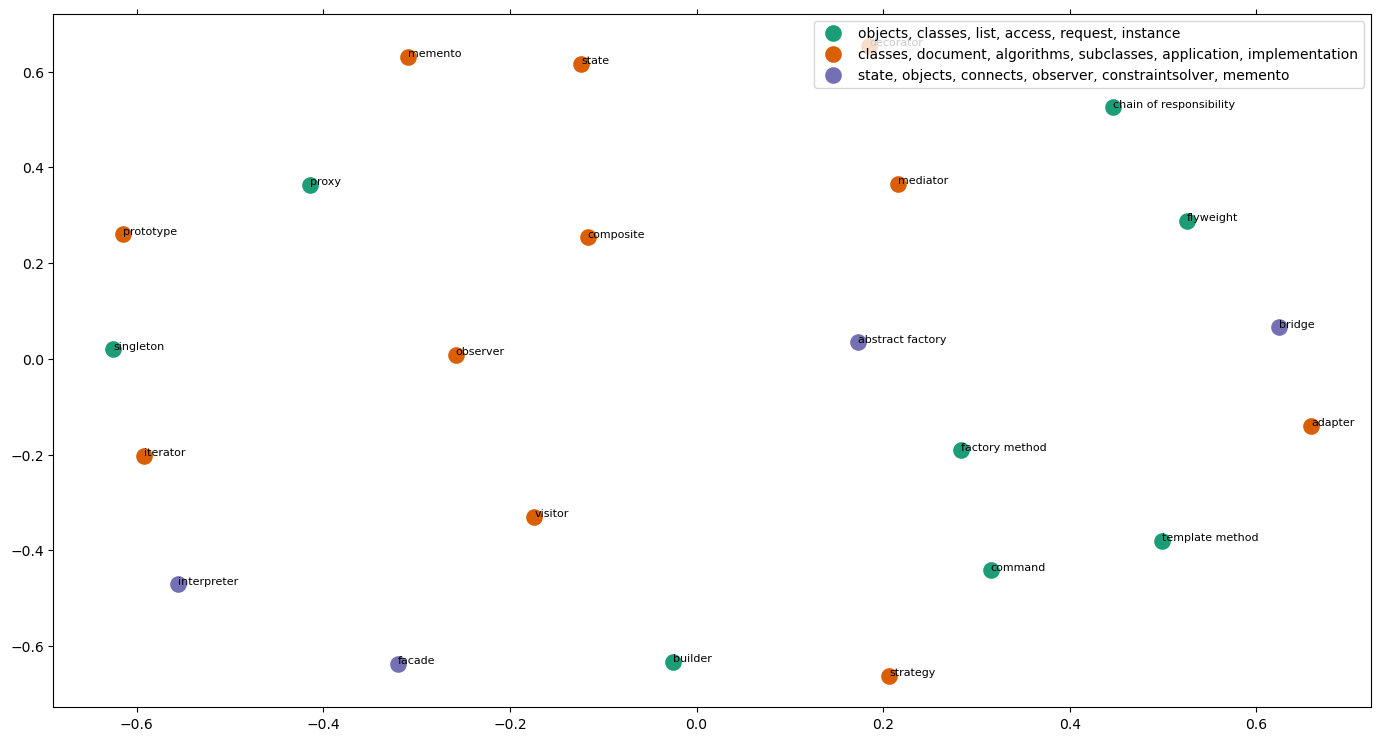

,x,y,label,title
1,-0.025293,-0.632781,0,builder
12,0.446315,0.525158,0,chain of responsibility
13,0.315163,-0.441469,0,command
2,0.282821,-0.191219,0,factory method
10,0.525498,0.288308,0,flyweight
11,-0.414244,0.363628,0,proxy
4,-0.625157,0.020116,0,singleton
21,0.498978,-0.379757,0,template method
5,0.658537,-0.139580,1,adapter
7,-0.116975,0.253777,1,composite


In [19]:

#some ipython magic to show the matplotlib plots inline
%matplotlib inline

display(df[:1])

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=df['name'].tolist())) 

display(df[:1])

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title


for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

display(df.sort_values(by=['label', 'title']))

# correct_clusters = pd.DataFrame({
#     'title': ['abstract factory', 'builder', 'factory method','prototype', 'singleton',
#               'adapter', 'bridge', 'composite', 'decorator', 'facade', 'flyweight', 'proxy',
#             'chain of responsibility', 'command', 'interpreter', 'iterator', 'mediator', 'memento', 'observer', 'state', 'strategy', 'template method', 'visitor'],
#     'label':[1,1,1,1,1
    


